###  print out structures

In [1]:
import random
import numpy as np
from mycrograd_debug.engine_debug import Value
from mycrograd_debug.nn_debug import Neuron, Layer, MLP, MLP_linear
from mycrograd_debug.drawviz_debug import draw_dot

np.random.seed(1337)
random.seed(1337)

#### Layer

Layer:  Layer of [LinearNeuron(2), LinearNeuron(2)]
Neurons:  [LinearNeuron(2), LinearNeuron(2)]
inputs  [Value(name=val7,neuronnumber=,type=i,data=1, grad=0), Value(name=val8,neuronnumber=,type=i,data=2, grad=0)]
number of Value objects created =  16
activation:  [Value(name=val12,neuronnumber=n1,type=a,data=0.36856800832294456, grad=1), Value(name=val16,neuronnumber=n2,type=a,data=0.07484613410783725, grad=0)]


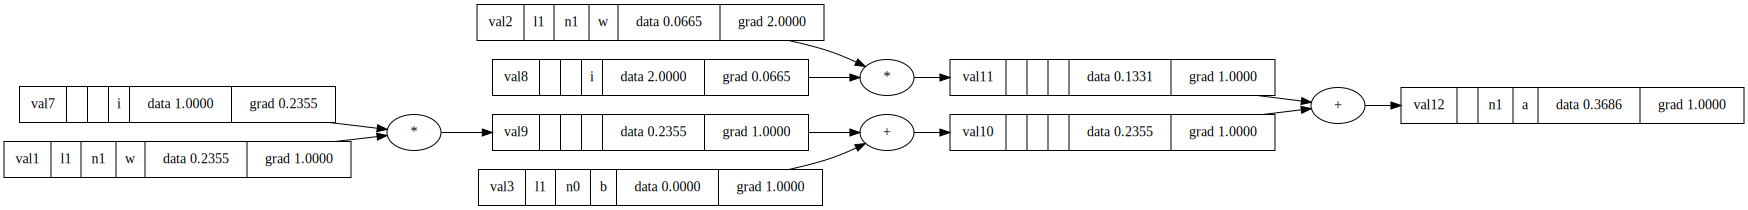

In [2]:
nin=2  #number of inputs
nout=2  #number of outputs

Value.value_counter=0
Neuron.neuron_counter=0
Layer.layer_counter =0

myLayer=Layer(nin,nout)
print("Layer: ",myLayer)
print("Neurons: ",myLayer.neurons)


# xinumbers= np.random.randint(1,10, size=(nin))   # inputs
xinumbers = list(range(1, nin+1))
xinput = [Value(x,type='i') for x in xinumbers]
print("inputs ", xinput)

activation=myLayer(xinput)
activation[0].backward()

print("number of Value objects created = ",Value.value_counter)

print("activation: ",activation)
draw_dot(activation[0])
# draw_dot(activation)


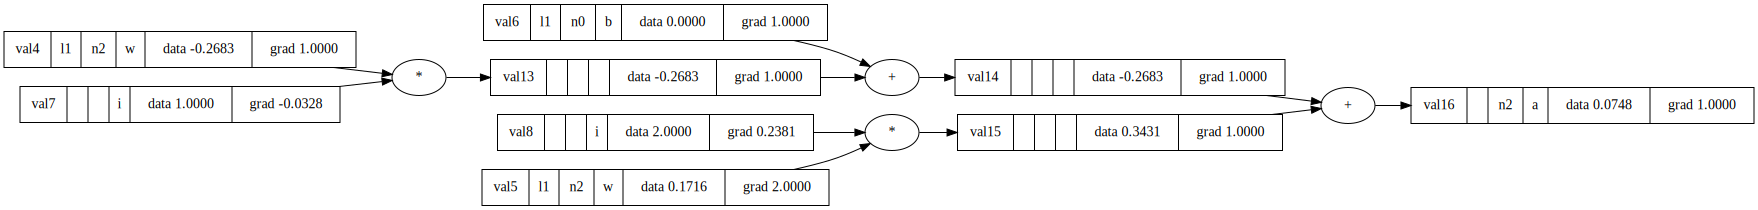

In [3]:
activation[1].backward()
draw_dot(activation[1])


desired outputs  [Value(name=val1,neuronnumber=,type=t,data=1.2, grad=0), Value(name=val2,neuronnumber=,type=t,data=1.3, grad=0)]
number of Value objects created =  13


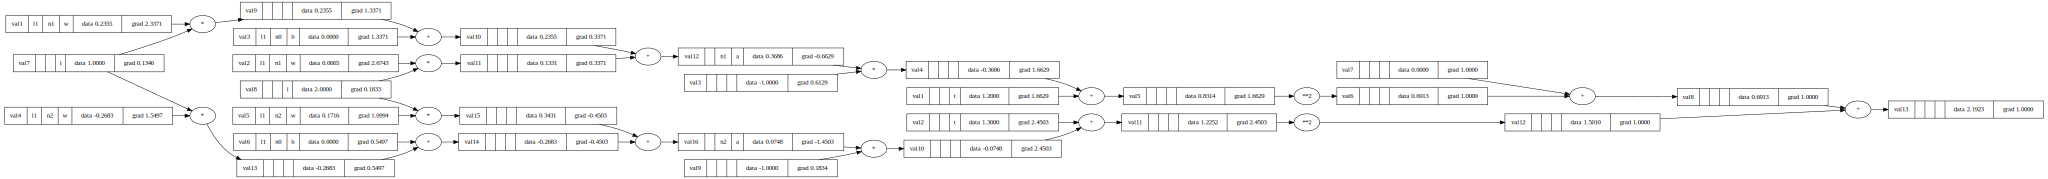

In [4]:

Value.value_counter=0
Neuron.neuron_counter=0
Layer.layer_counter =0

ys=[1.2,1.3] # desired targets
xtarget = [Value(x,type='t') for x in ys]
print("desired outputs ", xtarget)

loss = sum((yout - ygt) ** 2 for ygt, yout in zip(activation, xtarget))
loss.backward()
print("number of Value objects created = ", Value.value_counter)

draw_dot(loss)
